# Midterm - CO2 Emissions in China & the UK
#### Navya Mangipudi, Big Data & Analytics, 11-18-19


## Abstract 

In this lab, I will be exploring CO2 emissions data for China and the United Kingdom. I will be looking at trends in the data and will be trying to find historical events in connection to the trends in the data. 

This data was found here: https://www.kaggle.com/srikantsahu/co2-and-ghg-emission-data/data#emission%20data.csv
There are 268 columns and 232 rows and the data is measured by million tons of CO2 by country and through the years 1751 - 2017. 

## Dataset Exploration

In [278]:
#importing modules that may be necessary. 
import pandas as pd

import sys
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns  
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [279]:
#reading the csv file
df = pd.read_csv("emission data.csv")

In [280]:
#Getting info on the types of the columns so that I can keep this in mind if I need it later. Also to see ranges of 
#data (such as the fact that years goes to 2017 as seen below)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Columns: 268 entries, Country to 2017
dtypes: float64(98), int64(169), object(1)
memory usage: 483.7+ KB


In [281]:
#Taking a quick look at first few rows of the dataset.

df.head()

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [282]:
#Turning the countries into the index rather than having a numberical system. This way when I transpose, the years
#will become the index. 

df = pd.read_csv("emission data.csv", index_col='Country')  
df

,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
Africa,0,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
Albania,0,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
Algeria,0,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
Americas (other),0,0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
Andorra,0,0,0,0,0,0,0,0,0,0,...,9.258928e+06,9.775552e+06,1.029218e+07,1.078315e+07,1.127046e+07,1.174678e+07,1.220845e+07,1.268569e+07,1.319719e+07,1.371738e+07
Angola,0,0,0,0,0,0,0,0,0,0,...,3.316716e+08,3.592371e+08,3.881015e+08,4.182437e+08,4.514295e+08,4.838026e+08,5.182603e+08,5.530214e+08,5.883724e+08,6.237623e+08
Anguilla,0,0,0,0,0,0,0,0,0,0,...,1.725744e+06,1.872304e+06,2.022528e+06,2.165424e+06,2.308320e+06,2.443888e+06,2.586784e+06,2.735961e+06,2.888033e+06,3.040078e+06
Antarctic Fisheries,0,0,0,0,0,0,0,0,0,0,...,1.538880e+05,1.538880e+05,1.538880e+05,1.538880e+05,1.538880e+05,1.538880e+05,1.538880e+05,1.538880e+05,1.538880e+05,1.538880e+05


In [283]:
#Transposing dataframe to put countries as columns to make working with the dataframe easier
df = df.T

In [284]:
#Printing head to make sure that the dataframe has been transposed
df.head()

Country,Afghanistan,Africa,Albania,Algeria,Americas (other),Andorra,Angola,Anguilla,Antarctic Fisheries,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,World,Yemen,Zambia,Zimbabwe
1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9350528.0,0.0,0.0,0.0
1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18704720.0,0.0,0.0,0.0
1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28058912.0,0.0,0.0,0.0
1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,37416768.0,0.0,0.0,0.0
1755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46778288.0,0.0,0.0,0.0


In [285]:
#creating separate dataframe for just China data to make things easier. 
dfc = df[["China"]]
dfc.head()

Country,China
1751,0.0
1752,0.0
1753,0.0
1754,0.0
1755,0.0


In [286]:
dfu = df[["United Kingdom"]]

In [287]:
#printing head to make sure this works.
dfu.head()

Country,United Kingdom
1751,9350528.0
1752,18704720.0
1753,28058912.0
1754,37416768.0
1755,46778288.0


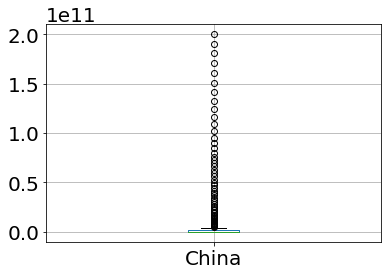

In [292]:
#Boxplot just to look at the distribution of values within the China data and to see if there are outliers. Looks like
#majority values are near/at 0 and the outliers seem to be values above. 

dfc.boxplot(column = "China" , return_type='axes')

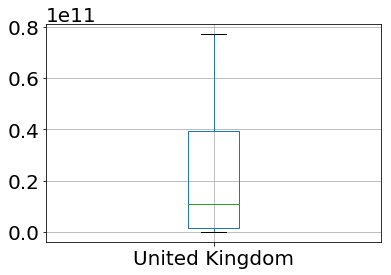

In [293]:
#Mkaing a boxplot to look at distribution. Looks like the UK does not have any outliers and the box seems quite large.
#Seems like more non-zero values too. 

dfu.boxplot(column = "United Kingdom" , return_type='axes')

## Dataset Modelling

### China Modelling:

In [ ]:
#Looking at describe just to see some basic statistical calculations for China. 
dfc.describe()

In [ ]:
#Splitting the dataset into 5 pieces so that I can make separate scatterplots to make looking at such a large dataset
#easier. 

dfc1 = np.array_split(dfc, 5)

In [ ]:
#Here, I am using .figure(figsize = (x, y) ) for size of graph. Using scatter with dfc1[0] which is the 1st dataframe
#created when I used split to split the overall larger dataframe. rcParams.update used for the font size and, 
#.xlabel & .ylabel are used to label the x and y columns. 

plt.figure(figsize=(60, 20))
plt.scatter(dfc1[0].index, dfc1[0], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')


In [ ]:
#Using with dfc1[1] for another graph of another dataframe piece. 

plt.figure(figsize=(60, 20))
plt.scatter(dfc1[1].index, dfc1[1], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')

In [ ]:
#Using with dfc1[2] for another graph of another dataframe piece. 

plt.figure(figsize=(60, 20))
plt.scatter(dfc1[2].index, dfc1[2], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')

In [ ]:
#Using with dfc1[3] for another graph of another dataframe piece. 

plt.figure(figsize=(60, 20))
plt.scatter(dfc1[3].index, dfc1[3], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')

In [ ]:
#Using with dfc1[4] for another graph of another dataframe piece. 

plt.figure(figsize=(60, 20))
plt.scatter(dfc1[4].index, dfc1[4], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions')

### United Kingdom Modelling:

In [ ]:
#Using describe to look at the statistical calculations for the data of the UK. 

dfu.describe()

In [ ]:
#Splitting the dataset into 5 pieces so that I can make separate scatterplots to make looking at such a large dataset
#easier. 

dfu1 = np.array_split(dfu, 5)

In [ ]:
#Here, I am using .figure(figsize = (x, y) ) for size of graph. Using scatter with dfu1[0] which is the 1st dataframe 
#created when I used split to split the overall larger dataframe. rcParams.update used for the font size and, 
#.xlabel & .ylabel are used to label the x and y columns. 

plt.figure(figsize=(60, 20))
plt.scatter(dfu1[0].index, dfu1[0], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')

In [ ]:
#Using with dfu1[1] for another graph of another dataframe piece. 

plt.figure(figsize=(60, 20))
plt.scatter(dfu1[1].index, dfu1[1], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')

In [ ]:
#Using with dfu1[2] for another graph of another dataframe piece. 

plt.figure(figsize=(60, 20))
plt.scatter(dfu1[2].index, dfu1[2], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')

In [ ]:
#Using with dfu1[3] for another graph of another dataframe piece. 

plt.figure(figsize=(60, 20))
plt.scatter(dfu1[3].index, dfu1[3], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')

In [ ]:
#Using with dfu1[4] for another graph of another dataframe piece. 

plt.figure(figsize=(60, 20))
plt.scatter(dfu1[4].index, dfu1[4], s = 30)
plt.rcParams.update({'font.size': 20 })

plt.xlabel('Year')
plt.ylabel('CO2 Emmissions (mill. tons)')

## Analysis

### China Section:

Here, we will be analyzing the CO2 data for China from 1751 - 2017 for trends and interesting pieces of data. 

From running describe, we can see that:

- the maximum amount of CO2 in the atmosphere is roughly 200 billion tons of CO2.


- We can also see that the minimum is 9,350,528 tons of CO2. Interesting considering the value of 0.0 tons can be seen on the graph however, perhaps this is the minimum non-zero value. 


- We can also see that the 50th percentile of the data is still 11,014,320,000 tons, showing us that in comparison, the UK has far more non-zero values than China. 


- It is also shown that the mean is 12,752,300,000 tons of CO2, an astoundingly large number despite the number of 0 values. 

By looking at the visualizations, we can see these statistics visually. As seen from describe, there are quite a few data values showing "0.00" as the amount of CO2 in the atmosphere, which is impossible due to the precense of natural CO2. We can see the max value (which occurs in 2017 unsurprisingly) and, we can also see trends in the data. We cannot look at data around the 1800s/1700s because of the lack of viable data however, we can see that the steepest parts of the data occur during the early 1900s and the early 2010s. The data increases the most during the years around the 1950s as well as around the years 2010 and more. 


### United Kingdom:

Here, we will be analyzing the CO2 data for the United Kingdom from 1751 - 2017 for trends and interesting pieces of data. 

From running describe, we can see that:

- the maximum amount of CO2 in the atmosphere is roughly 77 billion tons of CO2. A lot smaller than the max for China despite having a larger mean (below).


- We can also see that the minimum is 9,350,528 tons of CO2, a lot larger than the minimum for China. 


- We can also see that the 50th percentile of the data is still 0 tons, further showing us that a large percentage of the years in this data are unrecorded. 


- It is also shown that the mean is 22,194,820,000 tons of CO2, a larger mean compared to China. This is definitely due to the fact that the UK has a lot more non-zero values in comparison. 

By looking at the visualizations, we can see these statistics visually. As seen from describe, there are a few data values showing "0.00" as the amount of CO2 in the atmosphere (fewer than China), which is impossible due to the precense of natural CO2. We can see the max value (which occurs in 2017 unsurprisingly) and, we can also see trends in the data. We can see that the data seems to have periods of high increase during the 1840s and from 1965 to the present.


## Conclusion

### China:

From the code ran, we can conclude that: 

- mean = 12,752,300,000 tons
- minimum is 0.0 tons (unreliable)
- maximum = 200 billion tons

From the large upwards trends we see in the visualizations (during 1840s & 1965 - present), we can conjecture the causes through historical events. 

For around the 1950s, the reason behind the shift in emissions and the unsteady increases in CO2 emission is due to the fact that this is around the time that China, along with Russia and numerous other countries, began to rapidy industrialize. With the end of WWII, these countries now had the opportunity and the time to focus on development rather than on wartime events.

For around the early 2000s, this was the time that China began to produce the most. Factories and CO2 heavy modes of production were being used in full force and this is actually the time period where China's emissions actually grew enough to overtake the US as the heaviest emitter in the world. China officially established this position after 2005 and has been producing so much CO2 that they have consistently held this position until present day. 

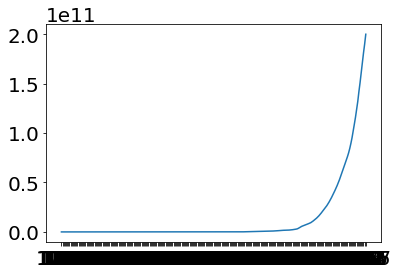

In [295]:
#Here is a line graph for the China data in order to present the final shape of the CO2 emissions for China. 

plt.plot(dfc)


### United Kingdom:

From the code ran, we can conclude that: 

- mean = 22,194,820,000 tons
- minimum is 9,350,528 tons
- maximum = 77 billion

From the large upwards trends we see in the visualizations (during 1840s & 1965 - present), we can conjecture the causes through historical events. 

For around the 1840's, it is a convincing conjecture to state that the increase in CO2 levels could be due to the Industrial revolution which occured around the mid 1800s. This was time of massive innovation, especially with the inventions of factories and other automated modes of produce. These new inventions however, burned a lot of coal and other fossil fuels to stay running, something which very likely had a hand in the large increase in CO2. 

For around the mid 1900s, the 1960's were a time where the word began to modernize to where it is now. There was a lot of innovation happening during this time and, more individuals were taking part in factory jobs and other production jobs. The modern market's means of productions were coming into place and that lead to a large increase in CO2 emission. Emissions in the UK were beginning to stabilize, with the graph since 1965 almost becoming linear rather than there being short stretches of increase before a slowing down.  

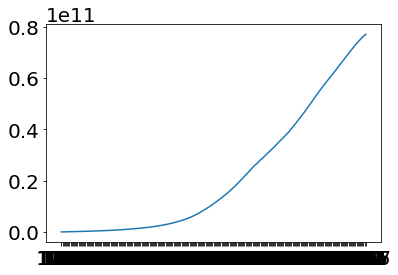

In [294]:
#Here is a line graph for the United Kingdom data in order to present the final shape of the CO2 emissions for China. 

plt.plot(dfu)

## Acknowlegements:

These are some of the history sources that I would like to acknowlege for my conclusion:
https://www.wri.org/blog/2014/05/history-carbon-dioxide-emissions
https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

Here was sites that I used in order to split the two dataframes:
https://stackoverflow.com/questions/17315737/split-a-large-pandas-dataframe
https://stackoverflow.com/questions/17315737/split-a-large-pandas-dataframe

Help for my scatter plot:
https://pythonspot.com/matplotlib-scatterplot/

Help for my line graph:
https://python-graph-gallery.com/120-line-chart-with-matplotlib/

Thank you to Ms. Sconyers for helping me with turning the China & UK data into their own separate dataframes. And for her code to transpose the dataframe. 
